## Necessary Library Installations and Imports

Folktables - Python library that allows us to access US Census Datasets for different states that consists of mulltiple sensitive attributes. <br>
Polars - Python Data Manipulation and Handling library. Similar to Pandas

In [1]:
!pip install folktables


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
!pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 57.0 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import folktables
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from folktables import ACSDataSource, ACSIncome, ACSPublicCoverage, generate_categories

Downloading in the following code takes longer to run, hence, ran once and commented out.

In [2]:
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
# ca_data = data_source.get_data(states=["CA","MA","TX", "NY", "GA"], download=True)

In [3]:
# print(list(ca_data.head().columns))

In [4]:
# ca_features, ca_labels, _ = ACSPublicCoverage.df_to_pandas(ca_data)
# ca_features.to_csv('data/multi_state_features.csv', index=False)
# ca_labels.to_csv('data/multi_state_labels.csv', index=False)

# Commented because already ran once and saved the CSV files

In [5]:
definition_df = data_source.get_definitions(download=True)
categories = generate_categories(features=ACSPublicCoverage.features, definition_df=definition_df)

In [6]:
categories.keys()

dict_keys(['SCHL', 'MAR', 'SEX', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC', 'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'ESR', 'ST', 'FER', 'RAC1P'])

In [7]:
features = pl.read_csv('data/multi_state_features.csv')
labels = pl.read_csv("data/multi_state_labels.csv")

In [8]:
features.shape,labels.shape

((364726, 19), (364726, 1))

In [9]:
features.describe()

statistic,AGEP,SCHL,MAR,SEX,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,PINCP,ESR,ST,FER,RAC1P
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",35.933569,16.554655,3.346452,1.565156,1.865258,0.300036,1.89032,1.325938,3.658231,1.76107,1.239635,1.980813,1.9744,1.931077,9577.727653,3.353663,24.817581,0.80549,2.630556
"""std""",15.550484,4.126389,1.864167,0.495737,0.341449,1.217979,1.550974,0.731327,1.067738,1.129982,0.426861,0.137182,0.157939,0.253323,9969.563992,2.455723,17.82939,0.970503,2.692612
"""min""",15.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-8300.0,0.0,6.0,0.0,1.0
"""25%""",21.0,15.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,6.0,0.0,1.0
"""50%""",33.0,17.0,5.0,2.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,6600.0,3.0,25.0,0.0,1.0
"""75%""",50.0,19.0,5.0,2.0,2.0,0.0,3.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,18000.0,6.0,48.0,2.0,2.0
"""max""",64.0,24.0,5.0,2.0,2.0,8.0,5.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,30000.0,6.0,48.0,2.0,9.0


In [10]:
column_details = {}
for col in features.columns:
    print(col,"---",definition_df[definition_df[1]==col].values[0][4])
    d  = {}
    d['Definition'] = definition_df[definition_df[1]==col].values[0][4]
    d['Possible Values'] = [col[6] for col in (definition_df[definition_df[1]==col].values.tolist()[1:])]
    column_details[col]=d    


AGEP --- Age
SCHL --- Educational attainment
MAR --- Marital status
SEX --- Sex
DIS --- Disability recode
ESP --- Employment status of parents
CIT --- Citizenship status
MIG --- Mobility status (lived here 1 year ago)
MIL --- Military service
ANC --- Ancestry recode
NATIVITY --- Nativity
DEAR --- Hearing difficulty
DEYE --- Vision difficulty
DREM --- Cognitive difficulty
PINCP --- Total person's income (signed, use ADJINC to adjust to constant dollars)
ESR --- Employment status recode
ST --- State Code based on 2010 Census definitions
FER --- Gave birth to child within the past 12 months
RAC1P --- Recoded detailed race code


In [11]:
column_details['RAC1P']

{'Definition': 'Recoded detailed race code',
 'Possible Values': ['White alone',
  'Black or African American alone',
  'American Indian alone',
  'Alaska Native alone',
  'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races',
  'Asian alone',
  'Native Hawaiian and Other Pacific Islander alone',
  'Some Other Race alone',
  'Two or More Races']}

In [12]:
import matplotlib.colors as mcolors
colors = np.random.choice(list(mcolors.CSS4_COLORS.keys()),size=19)
colors

array(['silver', 'darkolivegreen', 'darkblue', 'lawngreen',
       'mediumturquoise', 'darkgrey', 'blanchedalmond', 'chocolate',
       'lightgreen', 'orangered', 'mediumpurple', 'orchid', 'olivedrab',
       'mediumvioletred', 'lightslategrey', 'maroon', 'whitesmoke',
       'silver', 'darkred'], dtype='<U20')

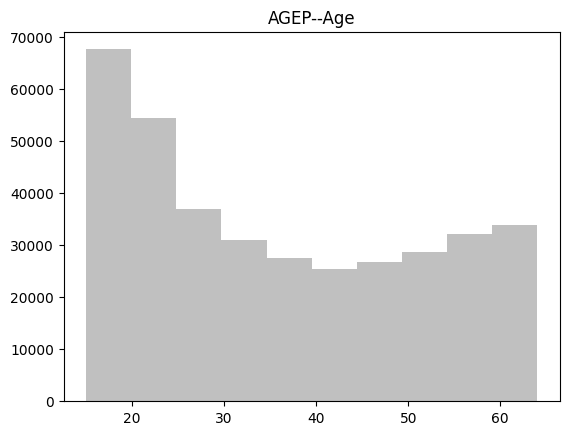

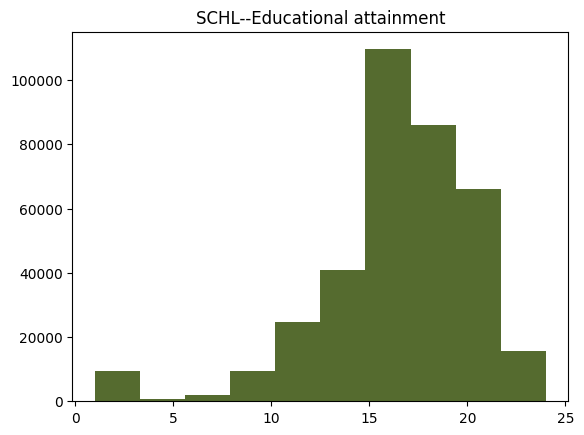

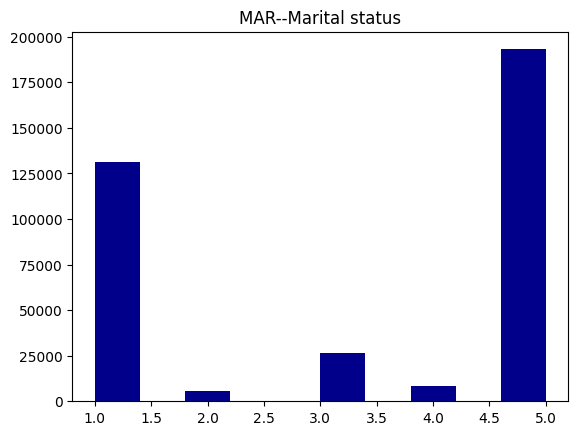

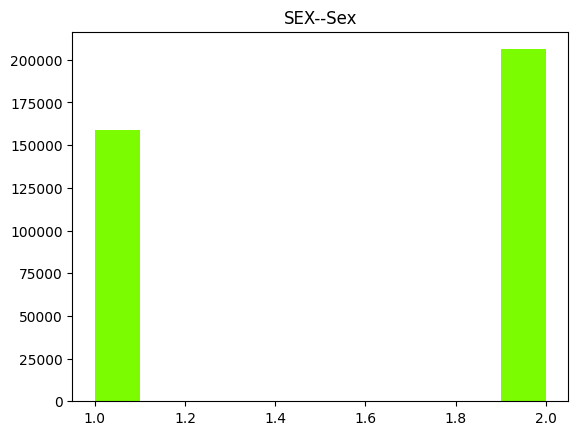

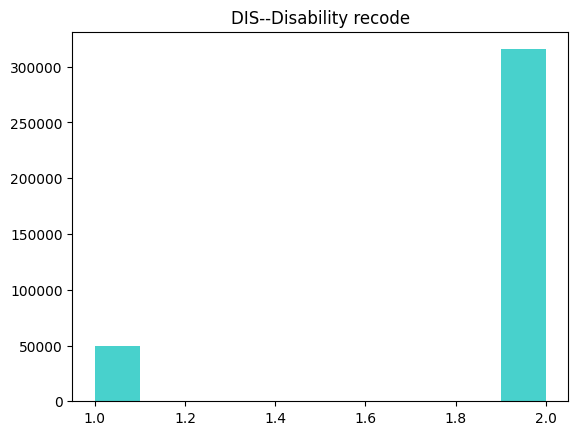

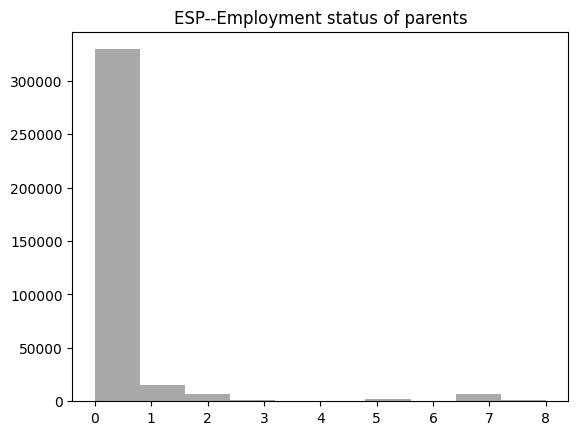

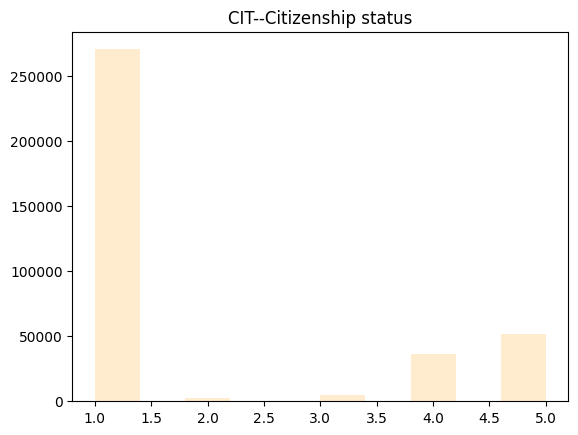

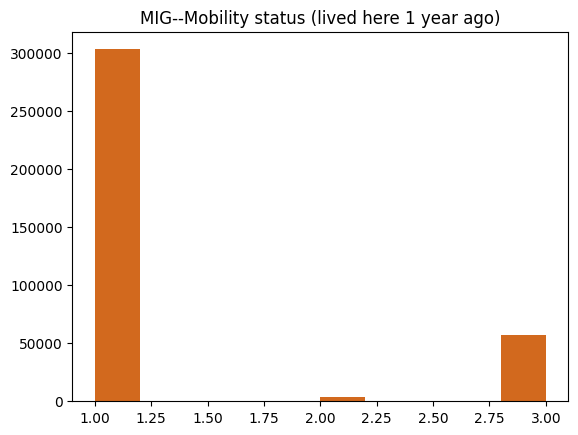

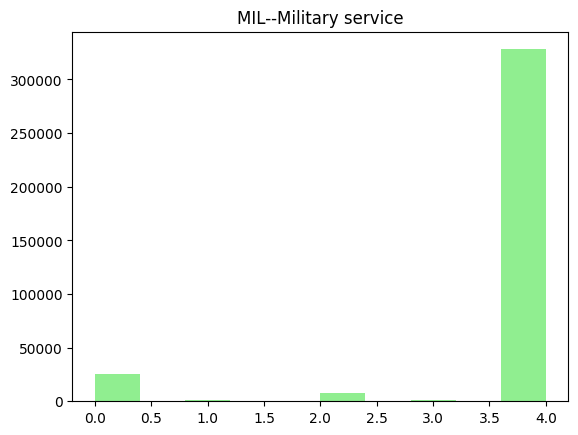

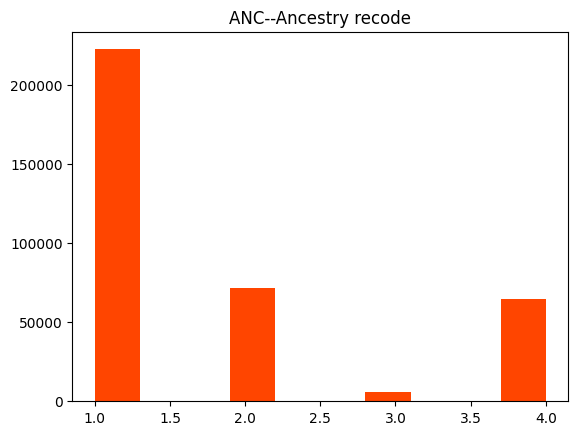

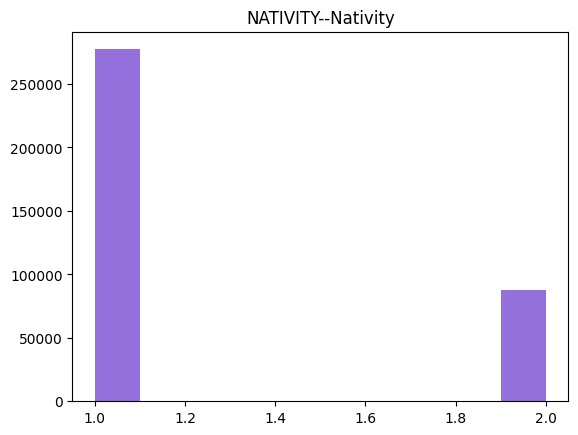

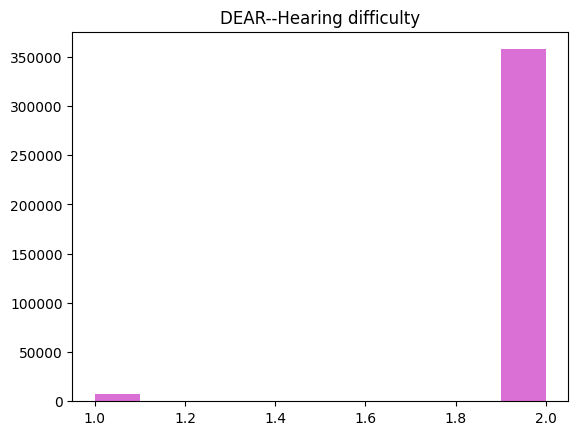

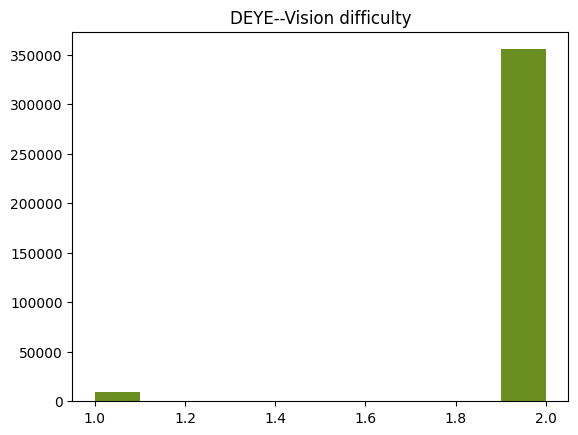

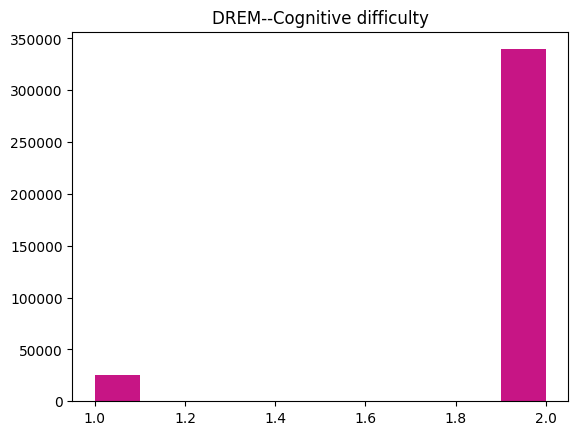

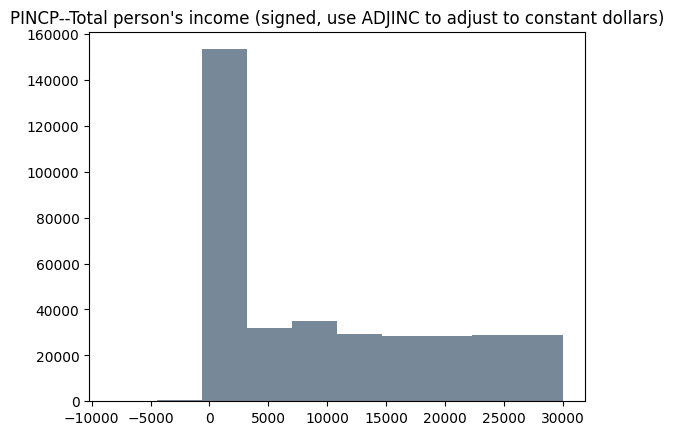

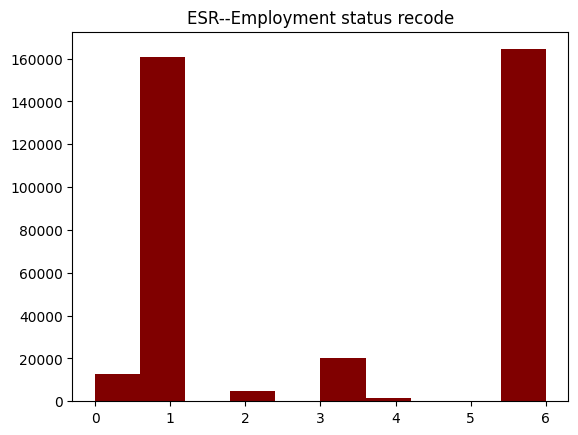

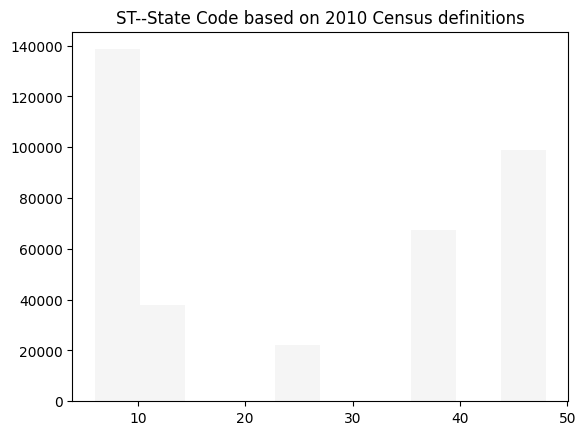

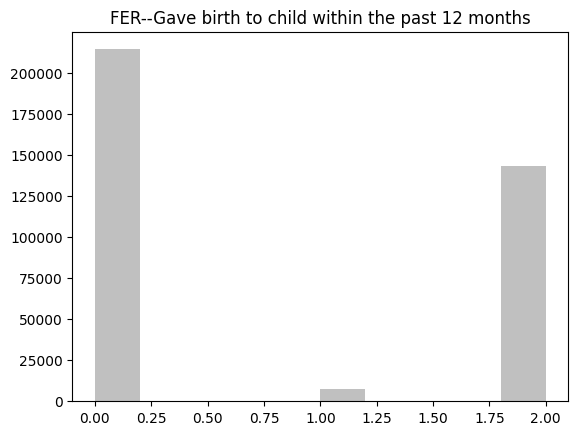

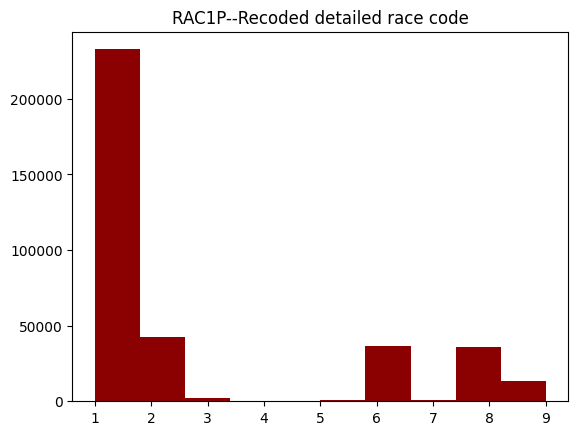

In [13]:
i = 0
used = {}
for col in features.columns:
    plt.hist(features[col],color=colors[i])
    plt.title(col+"--"+str(column_details[col]['Definition']))
    plt.show()
    used[col]=colors[i]
    i+=1
plt.show()

(array([252559.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 112167.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

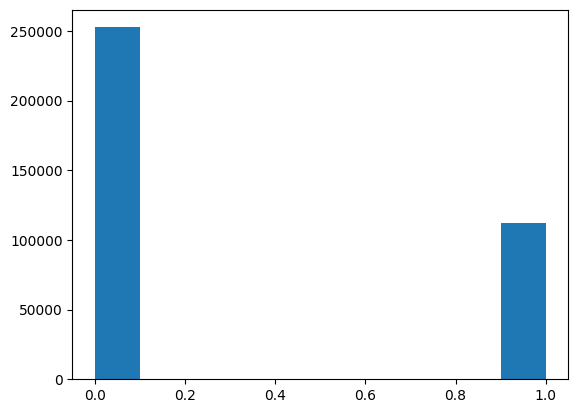

In [14]:
plt.hist(labels['PUBCOV']._recursive_cast_to_dtype(int))


Summary Statistics:
shape: (9, 21)
┌────────────┬───────────┬───────────┬──────────┬───┬───────────┬──────────┬──────────┬──────────┐
│ statistic  ┆ AGEP      ┆ SCHL      ┆ MAR      ┆ … ┆ ST        ┆ FER      ┆ RAC1P    ┆ label    │
│ ---        ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪══════════╪══════════╪══════════╡
│ count      ┆ 364726.0  ┆ 364726.0  ┆ 364726.0 ┆ … ┆ 364726.0  ┆ 364726.0 ┆ 364726.0 ┆ 364726.0 │
│ null_count ┆ 0.0       ┆ 0.0       ┆ 0.0      ┆ … ┆ 0.0       ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ mean       ┆ 35.933569 ┆ 16.554655 ┆ 3.346452 ┆ … ┆ 24.817581 ┆ 0.80549  ┆ 2.630556 ┆ 0.307538 │
│ std        ┆ 15.550484 ┆ 4.126389  ┆ 1.864167 ┆ … ┆ 17.82939  ┆ 0.970503 ┆ 2.692612 ┆ null     │
│ min        ┆ 15.0      ┆ 1.0       ┆ 1.0      ┆ … ┆ 6.0       ┆ 0.0    

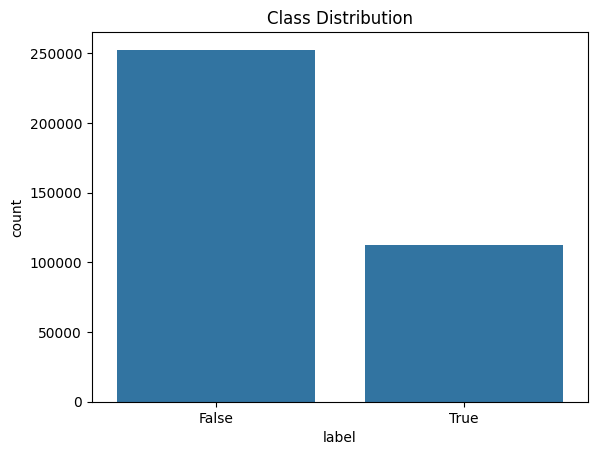

Model Accuracy: 0.7396430236065035
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.93      0.83     50512
        True       0.67      0.31      0.42     22434

    accuracy                           0.74     72946
   macro avg       0.71      0.62      0.63     72946
weighted avg       0.73      0.74      0.71     72946



In [ ]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load Data
# features = pl.read_csv('data/multi_state_features.csv').to_pandas()
# labels = pl.read_csv("data/multi_state_labels.csv").to_pandas()

# Merge data if necessary (assuming labels has a corresponding column 'label')
data = features.clone()
label = 'PUBCOV'
data = data.with_columns(label = labels[label])

# EDA: Display basic statistics
# print("Dataset Info:")
# print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check class balance
sns.countplot(x='label', data=data)
plt.title("Class Distribution")
plt.show()

numerical_cols = data.select(pl.selectors.numeric()).columns #data.by_dtype(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ]
)

X = data.drop(['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [24]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7396430236065035
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.93      0.83     50512
        True       0.67      0.31      0.42     22434

    accuracy                           0.74     72946
   macro avg       0.71      0.62      0.63     72946
weighted avg       0.73      0.74      0.71     72946



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7721465193430757
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.88      0.84     50512
        True       0.67      0.52      0.58     22434

    accuracy                           0.77     72946
   macro avg       0.74      0.70      0.71     72946
weighted avg       0.76      0.77      0.76     72946



In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def compute_fairness_metrics(y_true, y_pred, sensitive_attr):
    unique_groups = np.unique(sensitive_attr)
    results = {}
    
    for group in unique_groups:
        idx = (sensitive_attr == group)
        y_true_g = y_true[idx]
        y_pred_g = y_pred[idx]
        tn, fp, fn, tp = confusion_matrix(y_true_g, y_pred_g).ravel()
        
        TPR = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
        FPR = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
        PPV = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value (Precision)
        NPV = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
        
        results[group] = {
            "Demographic Parity": np.mean(y_pred_g),
            "Accuracy": accuracy_score(y_true_g, y_pred_g),
            "TPR": TPR,
            "FPR": FPR,
            "PPV": PPV,
            "NPV": NPV,
            "Disparate Mistreatment": abs((fp + fn) / len(y_true_g)),  # Error Rate Disparity
            "Equalized Odds": abs(TPR - FPR)  # Equalized Odds Calculation
        }
    
    return results

compute_fairness_metrics(y_test.to_pandas(),y_pred,X_test['DIS'])

{np.float64(1.0): {'Demographic Parity': np.float64(0.8177736965615754),
  'Accuracy': 0.6956433017039078,
  'TPR': np.float64(0.9011479591836735),
  'FPR': np.float64(0.6695947860583735),
  'PPV': np.float64(0.7051777916406737),
  'NPV': np.float64(0.6528555431131019),
  'Disparate Mistreatment': np.float64(0.30435669829609224),
  'Equalized Odds': np.float64(0.2315531731253)},
 np.float64(2.0): {'Demographic Parity': np.float64(0.036091535355135006),
  'Accuracy': 0.7464724047826431,
  'TPR': np.float64(0.07523821309243905),
  'FPR': np.float64(0.022625204861332824),
  'PPV': np.float64(0.5335673541026766),
  'NPV': np.float64(0.7544441888739197),
  'Disparate Mistreatment': np.float64(0.2535275952173569),
  'Equalized Odds': np.float64(0.052613008231106234)}}